# Homework 4 (100 Points)

## Exercise 1 (40pts)

In this exercise we will implement a Natural Language Processing (NLP) system using binary logistic regression.

The data you will be working with comes from the [Yelp Dataset](https://www.yelp.com/dataset). Each line is a review that consists of a label (0 for negative reviews and 1 for positive reviews) and a set of words.

```
1 i will never forget this single breakfast experience in mad...
0 the search for decent chinese takeout in madison continues ...
0 sorry but me julio fell way below the standard even for med...
1 so this is the kind of food that will kill you so there s t...
```

In order to transform the set of words into vectors, we will rely on a method of feature engineering called word embeddings. Rather than simply indicating which words are present, word embeddings represent each word by "embedding" it in a low-dimensional vector space which may carry more information about the semantic meaning of the word. (for example in this space, the words "King" and "Queen" would be close).

`word2vec.txt` contains the `word2vec` embeddings for about 15 thousand words. Not every word in each review is present in the provided `word2vec.txt` file. We can treat these words as being "out of vocabulary" and ignore them.

### Example

Let x_i denote the sentence `“a hot dog is not a sandwich because it is not square”` and let a toy word2vec dictionary be as follows:

```
hot      0.1     0.2     0.3
not      -0.1    0.2     -0.3
sandwich 0.0     -0.2    0.4
square   0.2     -0.1    0.5
```

we would first `trim` the sentence to only contain words in our vocabulary: `"hot not sandwich not square”` then embed x_i into the feature space:

$$ φ2(x_i)) = \frac{1}{5} (word2vec(\text{hot}) + 2 · word2vec(\text{not}) + word2vec(\text{sandwich}) + word2vec(\text{square})) = \left[0.02 \hspace{2mm} 0.06 \hspace{2mm} 0.12 \hspace{2mm}\right]^T $$

### Part 1 (20pts)

a) Implement a function to trim out-of-vocabulary words from the reviews. Your function should return an nd array of the same dimension and dtype as the original loaded dataset. (10pts)

In [35]:
import numpy as np
np.array([0.02,0.06,0.12]).T

array([0.02, 0.06, 0.12])

In [97]:

import csv
import numpy as np

VECTOR_LEN = 300   # Length of word2vec vector
MAX_WORD_LEN = 64  # Max word length in dict.txt and word2vec.txt

################################################################################
# We have provided you the functions for loading the tsv and txt files. Feel   #
# free to use them! No need to change them at all.                             #
################################################################################


def load_tsv_dataset(file):
    """
    Loads raw data and returns a tuple containing the reviews and their ratings.

    Parameters:
        file (str): File path to the dataset tsv file.

    Returns:
        An np.ndarray of shape N. N is the number of data points in the tsv file.
        Each element dataset[i] is a tuple (label, review), where the label is
        an integer (0 or 1) and the review is a string.
    """
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset


def load_feature_dictionary(file):
    """
    Creates a map of words to vectors using the file that has the word2vec
    embeddings.

    Parameters:
        file (str): File path to the word2vec embedding file.

    Returns:
        A dictionary indexed by words, returning the corresponding word2vec
        embedding np.ndarray.
    """
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map



       


def trim_reviews(path_to_dataset):
    data = load_tsv_dataset(path_to_dataset)
    dic = load_feature_dictionary("./data/word2vec.txt")
    #data['f0'] is the label, f1 is set of words
    t_reviews = np.empty_like(data['f1'], dtype=object)
    label = np.empty_like(data['f0'], dtype=int)

    for x in range(len(data)):
        words = data[x][1].split()
        trimmed = [w.lower() for w in words if w.lower() in dic]
        t_review = " ".join(trimmed)
        t_reviews[x] = t_review
        label[x] = data[x][0]
    return np.array(list(zip(label, t_reviews)), dtype='int64, O')

trim_train = trim_reviews("./data/train_small.tsv")
trim_test = trim_reviews("./data/test_small.tsv")

In [53]:
dic = load_feature_dictionary("./data/word2vec.txt")
data = load_tsv_dataset("./data/train_small.tsv")

In [54]:
print(len(data[10][1]))
print(len(trim_train[10][1]))
print(np.dtype(trim_train[0]))
print(np.dtype(data[0]))

554
496
[('f0', '<i8'), ('f1', 'O')]
[('f0', '<i8'), ('f1', 'O')]


In [98]:
print(data[10][1])
print(trim_train[10][1])

so we decided to cilantro a try apps and drinks were fine my dinner and my wife s dinner were luke warm at least our two other friends had hot food served to them took ten minutes to get our meals back the owner came over to apologize but the waiter never did when we got our bill which was good bill for 4 130 i expected to see something knocked off the bill due to having to send the food back last time i eat there and besides this review i will let others to go to our favorite mexican place la mestiza or casa del sol instead hasta la vista cilantro
so we decided to a try and drinks were fine my dinner and my wife s dinner were luke warm at least our two other friends had hot food served to them took ten minutes to get our meals back the owner came over to apologize but the waiter never did when we got our bill which was good bill for i expected to see something knocked off the bill due to having to send the food back last time i eat there and besides this review i will let others to go

b) Implement the embedding and store it to a `.tsv` file where the first column is the label and the rest are the features from the embedding. Round all numbers to 6 decimal places. `embedded_train_small.tsv` and `embedded_test_small.tsv` contain the expected output of your function. (10pts)

In [99]:
def embed_reviews(trimmed_dataset):
   
    dic = load_feature_dictionary("./data/word2vec.txt")
    num_features = len(next(iter(dic.values())))
    embedded_dataset = np.zeros((len(trimmed_dataset), num_features + 1))

    for x in range(len(trimmed_dataset)):
        
        words = trimmed_dataset[x][1].split()
        sentence_embed = np.zeros(num_features)
        sum_embedded = 0

        for w in words:
            if w in dic:
                sentence_embed += dic[w]
                sum_embedded +=1
        feature = sentence_embed / sum_embedded
        embedded_dataset[x][0] = trimmed_dataset[x][0]
        embedded_dataset[x][1:] = feature
       
    return embedded_dataset


def save_as_tsv(dataset, filename):
    with open(filename, 'w+') as f:
        for r in dataset:
            r_str = "\t".join([str(round(x, 6)) for x in r])
            f.writelines(r_str + "\n")
    return

embedded_train = embed_reviews(trim_train)
embedded_test = embed_reviews(trim_test)

save_as_tsv(embedded_train, "./data/output/embedded_train_small.tsv")
save_as_tsv(embedded_test, "./data/output/embedded_test_small.tsv")

In [67]:
print(trim_train.shape)
print(embedded_train.shape)
print(embedded_test.shape)

(20,)
(20, 301)
(8, 301)


### Part 2 (20pts)

In this part we'll be implementing Gradient Descent for binary Logistic Regression Classifier.

Some rules:

1. Include an intercept term in your model. You must consider the bias term as part of the weight vector and not a separate term to keep track of.
2. Initialize all model parameters to 0
3. Use vector and matrix multiplication

The expected `metrics.txt` from the dataset with `500` epochs and `0.001` learning rate is:

```
error(train): 0.000000
error(test): 0.625000
```

We will be testing your code on other, larger datasets.

In [2]:
import numpy as np
import math
def load_tsv_dataset(file):
    return np.loadtxt(file, delimiter='\t', encoding='utf-8')


def sigmoid(x):
    return 1/(1+math.e**(-x))



def gd(theta, X, y, learning_rate):
    # TODO: implement in vector form
    y_pred = sigmoid(np.dot(X,theta))
    gradients = np.dot(X.T, (y_pred-y))
    theta = theta- learning_rate*gradients
    # theta += learning_rate * gradients
    return theta


def train(theta, X, y, num_epoch, learning_rate):
    for m in range(num_epoch):
        theta = gd(theta, X, y, learning_rate)
    return theta


def predict(theta, X):
    # TODO: implement in vector form
    y_pred = sigmoid(np.dot(X,theta))
    cutoff = 0.5
    # return np.where(y_pred > cutoff, 1,0)
    # return(y_pred>=cutoff).astype(int)
    return np.array([1 if yp >cutoff else 0 for yp in y_pred])


def compute_error(y_pred, y):
    # TODO: implement in vector form
    # return np.mean(y_pred != y)
    return np.mean(np.abs(y_pred -y))



def write_metrics(train_err, test_err, metrics_out):
    with open(metrics_out, 'w+') as f:
        w = "error(train): " + "{:.6f}".format(train_err) + "\n"
        w += "error(test): " + "{:.6f}".format(test_err) + "\n"
        f.write(w)
    return


def logistic_reg(formatted_train, formatted_test, metrics_out, num_epochs, learning_rate):
    
    #x_train
    X = load_tsv_dataset(formatted_train)[:, 1:]
    #y_train
    y = load_tsv_dataset(formatted_train)[:,0]
    print(X.shape)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    print("after stacking")
    print(X.shape)
    theta = np.zeros(X.shape[1])
    # print(X.shape[0])
    # print(len(X[0])+1)

    learned_theta = train(theta, X, y, num_epochs, learning_rate)
    train_pred = predict(learned_theta, X)
    train_err = compute_error(train_pred, y)
    X_test = load_tsv_dataset(formatted_test)[:, 1:]
    # X_test = load_tsv_dataset(formatted_test)[:, :-1]
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    # y_test = load_tsv_dataset(formatted_test)[:, -1]
    y_test = load_tsv_dataset(formatted_test)[:,0]

    test_pred = predict(learned_theta, X_test)
    test_err = compute_error(test_pred, y_test)

    write_metrics(train_err, test_err, metrics_out)
    return


# logistic_reg("./data/embedded_train_small.tsv", "./data/embedded_test_small.tsv", "./data/output/metrics.txt", 500, 0.001)
logistic_reg("./data/output/embedded_train_small.tsv", "./data/output/embedded_test_small.tsv", "./data/output/metrics.txt", 500, 0.001)


(20, 300)
after stacking
(20, 301)


## Exercise 2 (60 Points)

For this exercise, recall the lab's kaggle competition where you predicted if a cookie was defective or not (assuming you attend labs). For more information on the data and details, [click here to view the competition and data details](https://www.kaggle.com/competitions/cs506-lab-defective-cookie-detection/data)

However, what we will do differently here is check if two of the features were correlated. This is important because if two features are correlated, then we can remove one of the features and still get the same information. This is part of the feature selection process.

### Loading in the Data

For this exercise, we are interested in the two features `Texture Hardness` and `Texture Chewiness` and want to see if they are related. To do this, we will load in the data and create a scatter plot of the two features.

**a)** (1 Point) Download the kaggle data from the link above and read in the `csv` files `cookie_train.csv` and `cookie_test.csv`

In [3]:
#Code in this cell
#getting train and test data
import pandas as pd

train_data = pd.read_csv('./data/cookie_train.csv')
test_data = pd.read_csv('./data/cookie_test.csv')

#let's see what we have
train_data.dtypes

Id                           int64
Texture Hardness             int64
Texture Chewiness          float64
Texture Crispiness         float64
Color L*                     int64
Color a*                     int64
Color b*                     int64
Taste Sweetness            float64
Taste Saltiness            float64
Taste Bitterness           float64
Shape Diameter             float64
Shape Thickness            float64
Smell Intensity            float64
Smell Complexity             int64
Smell Specific Compound      int64
Detected Chemical           object
Defective                    int64
dtype: object

### Combining Training and Testing Data

The lab did not have a lot of cookies for the training set, so what we will do is combine the training and testing data together without any loss of generality.

**b)** (3 Point) Combine the training and testing data together into a single dataframe called `cookie_data` and plot the scatter plot for `Texture Chewiness` (our y or our response variable) and `Texture Hardness` (our x or our explanatory variable). Make sure to label your axes and give your plot a title.

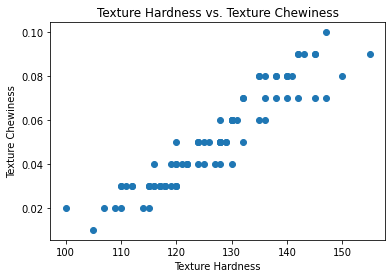

In [4]:
#Code in this cell
import pandas as pd
import matplotlib.pyplot as plt
frames = [train_data, test_data]
cookie_data = pd.concat(frames)
cookie_data.head(10)



plt.scatter(cookie_data["Texture Hardness"], cookie_data["Texture Chewiness"])
plt.title("Texture Hardness vs. Texture Chewiness")
plt.xlabel("Texture Hardness")
plt.ylabel("Texture Chewiness")
plt.show()

### Checking If We Can Do Linear Regression

It is important to check all requirements/assumptions for linear regression are met before we do linear regression. One of the requirements is that the explanatory variable and response variable are linearly related, which we checked by noticing the scatter plot was linear. However, there is much more to check!

#### Checking for Normality
It is important to check that the response variable is normally distributed. This is important for hypothesis testing and relates to the idea of linear regression being an unbiased, minimum variance estimator (if you're interested in this, check out the course CAS MA 582).


**c) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Chewiness` follows the normality assumption. State whether the normality assumption is met or not. If it is not met, state what can we do to fix this.

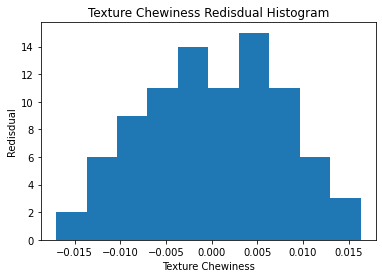

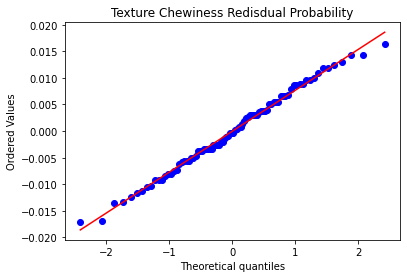

In [5]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
model = LinearRegression().fit(cookie_data[["Texture Hardness"]], cookie_data["Texture Chewiness"])

predicted_texture_chewiness = model.predict(cookie_data[["Texture Hardness"]])
residuals = cookie_data["Texture Chewiness"] - predicted_texture_chewiness

plt.hist(residuals, bins=10)
plt.title("Texture Chewiness Redisdual Histogram")
plt.xlabel("Texture Chewiness")
plt.ylabel("Redisdual")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Texture Chewiness Redisdual Probability")
plt.show()

Texture Chewiness variable is normally distributed. The  histogram (or "density function") is pretty much bell-shaped, and is symmetric around the mean. Also, the probability plot is linear. Normality assumption is met

#### Checking for Homoscedasticity
It is important to check that the variance of the response variable is the same across all values of the explanatory variable. Otherwise, the confidence around a predicted value of the response variable will vary depending on the explanatory variable value.

**d) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Chewiness` follows the homoscedasticity assumption. State whether the homoscedasticity assumption is met or not. If it is not met, state what can we do to fix this.

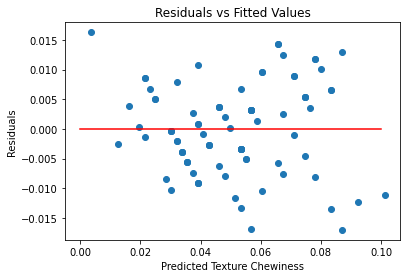

In [6]:
#non-constant variance, if it is funnel shape, need to transform it to the constant variance
#try log, if not work, than state good reasoning
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression().fit(cookie_data[["Texture Hardness"]], cookie_data["Texture Chewiness"])

predicted_texture_chewiness = model.predict(cookie_data[["Texture Hardness"]])
residuals = cookie_data["Texture Chewiness"] - predicted_texture_chewiness
xs = np.linspace(0, 0.1, 1000)
fig, ax = plt.subplots()
ax.scatter(predicted_texture_chewiness, residuals)
ax.plot(xs, np.zeros_like(xs), c='r')
ax.set_title("Residuals vs Fitted Values")
ax.set_xlabel("Predicted Texture Chewiness")
ax.set_ylabel("Residuals")
plt.show()

The scatter plot shows a funnel shape, indicating it has non-Constant Variance. For example above if x is close to 0 then we will be closer to the true y than if x is closer to say 0.1. We need to transform the data so homoscedasticity assumption is met. There are different ways to improve the homoscedasticity, like taking log or sqaure root of the value, or use transformers from library: box-cox.

#### Checking for Independence
It is important to check that the explanatory variable and response variable are independent. Otherwise, the model isn't really best fit with a line. To do so, we will use the Durbin-Watson test.

**e) (5 Points)** Use the Durbin-Watson test to determine if the explanatory variable and response variable are independent. State whether if the independence assumption is met or not. If it is not met, state what can we do to fix this. You may use any library to do this, and for more information, check out [this link](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp).

In [5]:
import statsmodels.api as sm


model = sm.OLS(cookie_data["Texture Chewiness"], sm.add_constant(cookie_data["Texture Hardness"])).fit()

test_result = sm.stats.durbin_watson(model.resid)

print("Durbin-Watson is", test_result)



Durbin-Watson is 2.2797136857816565


_(Written response goes in this cell)_
DW test statistic value is in the range of 1.5 to 2.5, which means the independence assumption is met.

#### Adjusting the Model
If you think any of the assumptions are not met, then you should respectively fix the model.

**f) (6 Points)** If you think atleast one of the assumptions were not met, then adjust the model how you described you would. Otherwise, proceed to the next step and in the cell below, write "No adjustments were made to the model". However, if you do adjust the model, then in the cell below, justify why your adjustments is appropriate (i.e. plot the new graphs and statistics found above). You may add as many cells as you like.

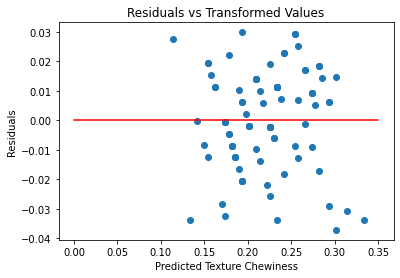

In [11]:
#here below will imrpove the homoscedasticity by transforming the texture chewiness with sqaure root
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import numpy as np
cookie_copy_15 = cookie_data.copy()
cookie_copy_15["Texture Chewiness"]=np.sqrt(cookie_copy_15["Texture Chewiness"])

model = LinearRegression().fit(cookie_copy_15[["Texture Hardness"]], cookie_copy_15["Texture Chewiness"])

predicted_texture_chewiness = model.predict(cookie_copy_15[["Texture Hardness"]])
residuals = cookie_copy_15["Texture Chewiness"] - predicted_texture_chewiness
xs = np.linspace(0, 0.35, 1000)
fig, ax = plt.subplots()
ax.scatter(predicted_texture_chewiness, residuals)
ax.plot(xs, np.zeros_like(xs), c='r')
ax.set_title("Residuals vs Transformed Values")
ax.set_xlabel("Predicted Texture Chewiness")
ax.set_ylabel("Residuals")
plt.show()

To improve the homoscedasticity: 
From part d, we saw that the variable texture chewiness shows heteroskedasticity, which is when the variance of the error term, or the residual variance, is not constant across observations. Thus, I decide to use sqaure root to transform the texture chewiness. From the new scatter plot, we can tell the variance of the error term is much more constant, noting if x is close to 0.15, we are roughly the same distance to true y comparing to the distance from x closer to say 0.25

### Hypothesis Testing
Now that we have a model that is appropriate, we can do hypothesis testing. We will be using the Linear Regression t-test to test if the explanatory variable is a significant predictor of the response variable.

**g) (5 Points)** Use the Linear Regression t-test to determine if the explanatory variable `Texture Hardness` is a significant predictor of the response variable `Texture Chewiness`. State whether if the explanatory variable is a significant predictor of the response variable or not using an alpha significance level of $\alpha = 0.05$, the null hypothesis $\beta_{hardness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

In [8]:
#Your code in this cell
# origional dataset
import statsmodels.api as sm
X = cookie_data["Texture Hardness"]
y = cookie_data["Texture Chewiness"]

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     625.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.27e-41
Time:                        16:52:13   Log-Likelihood:                 305.19
No. Observations:                  88   AIC:                            -606.4
Df Residuals:                      86   BIC:                            -601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1736      0.009  

In [12]:
# cookie_copy_9 is the transformed dataset
import statsmodels.api as sm
X = cookie_copy_15["Texture Hardness"]
y = cookie_copy_15["Texture Chewiness"]

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     657.4
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.79e-42
Time:                        16:04:18   Log-Likelihood:                 235.87
No. Observations:                  88   AIC:                            -467.7
Df Residuals:                      86   BIC:                            -462.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2860      0.020  

_(Written response goes in this cell)_
Both the p-values in the origional dataset and the transformed model are below 0.05, our variable provides enough evidence to reject the null hypothesis. we can say the Texture Hardness variable is a significant predictor of Texture Chewiness.


### Adding a New Feature
Now that we have determined that the explanatory variable is a significant predictor of the response variable, you noticed the fit isn't 100% perfect still (e.g. your model is not capturing all the variation in the data). You think that there is another feature that can help improve the model. You think that the feature `Taste Sweetness` can help improve your model. You want to test if this is true. You may assume that all the assumptions are met for this new model to conduct linear regression.

**h) (10 Points)** Now that you have two features to predict your response variable, you will have to use multiple linear regression. Use the `statsmodels` library to do multiple linear regression. Then, determine if the explanatory variables `Texture Hardness` and `Taste Sweetness` are significant predictors of the response variable `Texture Chewiness` using an alpha significance level of $\alpha = 0.001$, the null hypothesis $\beta_{hardness} = 0$ and $\beta_{sweetness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$ and $\beta_{sweetness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

Moreover, justify whether the overall model is significant or not using the F-test with the same $\alpha$ given above. If it is not, state what can we do to fix this.

_You may use the transformed model made (if one was made) from the previous parts and add this new feature to it._

In [10]:
#Your code in this cell
#origional data
import statsmodels.api as sm


X = cookie_data[["Texture Hardness","Taste Sweetness"]]
y = cookie_data["Texture Chewiness"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     560.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.13e-49
Time:                        16:52:46   Log-Likelihood:                 328.93
No. Observations:                  88   AIC:                            -651.9
Df Residuals:                      85   BIC:                            -644.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1096      0.011  

In [13]:
#Your code in this cell
#transformed data
import statsmodels.api as sm


X = cookie_copy_15[["Texture Hardness","Taste Sweetness"]]
y = cookie_copy_15["Texture Chewiness"]

X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     501.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           8.77e-48
Time:                        16:06:18   Log-Likelihood:                 253.14
No. Observations:                  88   AIC:                            -500.3
Df Residuals:                      85   BIC:                            -492.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1617      0.025  

_(Written response goes in this cell)_
p values in origional dataset and the transformed dataset are still 0, that means both are smaller than 0.001. Thus, we can conclude that the explanatory variables `Texture Hardness` and `Taste Sweetness` are significant predictors of the response variable `Texture Chewiness`
Prob (F-statistic) are 1.13e-49 and 8.77e-48, which are way less than 0.001, we reject the null hypothesis that model has no predictive power and overall model is significant. 

### Interpretation
It is important to be able to interpret the results of the model. This is important because it allows us to understand the model and how it works. It also allows us to understand the relationship between the predictors and the response variable, and this applies to not just linear regression, but all learning models.

**i) (10 Points)** Interpret the coefficients of the model made in part **h**. What do they mean? What do they represent? What do they tell us about the relationship between the predictors and the response variable? If your code output in part h does not provide these results, you are welcome to use any library here to do so.

In [12]:
#Your code in this cell if you need it
#origional data
import statsmodels.api as sm


X = cookie_data[["Texture Hardness","Taste Sweetness"]]
y = cookie_data["Texture Chewiness"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     560.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.13e-49
Time:                        16:54:40   Log-Likelihood:                 328.93
No. Observations:                  88   AIC:                            -651.9
Df Residuals:                      85   BIC:                            -644.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1096      0.011  

In [14]:
#Your code in this cell if you need it
#transformed data
import statsmodels.api as sm


X = cookie_copy_15[["Texture Hardness","Taste Sweetness"]]
y = cookie_copy_15["Texture Chewiness"]

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     501.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           8.77e-48
Time:                        16:07:32   Log-Likelihood:                 253.14
No. Observations:                  88   AIC:                            -500.3
Df Residuals:                      85   BIC:                            -492.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1617      0.025  

_(Written response goes in this cell)_
coefficients for the Texture Hardness variable are 0.0011/0.0026, and the coefficient for the Taste Sweetness variable is 0.0107 in origional dataset and 0.0207 in the transformed model. The two positive coefficients indicate that as the value of the predictors(Texture Hardness, Taste Sweetness) increase, the mean of the response variable Texture Chewiness also tends to increase. The coefficient value signifies how much the mean of the response variable changes given a one-unit shift in the predictor while holding other variables in the model constant. Here we know a one-unit increase in Texture Hardness while holding Taste Sweetness constant would result in an expected increase of 0.0011/0.0026 units in Texture Chewiness. Similarly, a one-unit increase in Taste Sweetness while holding Texture Hardness constant would result in an expected increase of 0.0107/0.0207 units in Texture Chewiness. From p values we discussed above, they are both below alpha. This tells us two variables are significant predictors of Texture Chewiness. This means that we can reject the null hypothesis that the coefficients are equal to zero, indicating that there is a significant relationship between Texture Hardness, Taste Sweetness, and Texture Chewiness.

### Using Taste Bitterness over Taste Sweetness
You think that the feature `Taste Bitterness` can help improve your model since `Taste Sweetness` wasn't it.

For this section, you will continue to use your fixed/adjusted features for `Texture Hardness` and `Texture Chewiness`.

**j) (10 Points)** Plot 2 scatter plots: `Taste Bitterness` vs your possibly adjusted `Texture Chewiness` and `Taste Bitterness` vs your possibly adjusted `Texture Hardness`. Given these plots, propose an appropriate model. Justify your answer by fitting it and seeing its accuracy (you can use any metric to prove so), showing appropriate models/graphs, and ensuring assumptions are satisfied (if any). You may use any library to do this.

In [21]:
import statsmodels.api as sm
X = cookie_copy_15[["Texture Hardness","Taste Bitterness"]]
y = cookie_copy_15["Texture Chewiness"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Texture Chewiness   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     333.4
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.81e-41
Time:                        16:19:15   Log-Likelihood:                 236.88
No. Observations:                  88   AIC:                            -467.8
Df Residuals:                      85   BIC:                            -460.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2586      0.028  

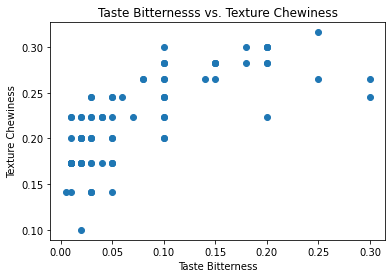

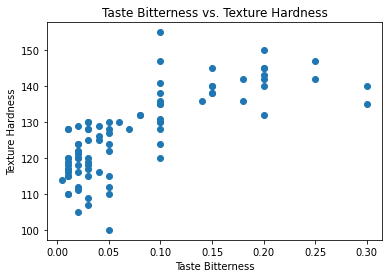

In [15]:

plt.scatter(cookie_copy_15["Taste Bitterness"], cookie_copy_15["Texture Chewiness"])
plt.title("Taste Bitternesss vs. Texture Chewiness")
plt.xlabel("Taste Bitterness")
plt.ylabel("Texture Chewiness")
plt.show()

plt.scatter(cookie_copy_15["Taste Bitterness"], cookie_copy_15["Texture Hardness"])
plt.title("Taste Bitterness vs. Texture Hardness")
plt.xlabel("Taste Bitterness")
plt.ylabel("Texture Hardness")
plt.show()

<AxesSubplot:xlabel='Taste Bitterness', ylabel='Texture Chewiness'>

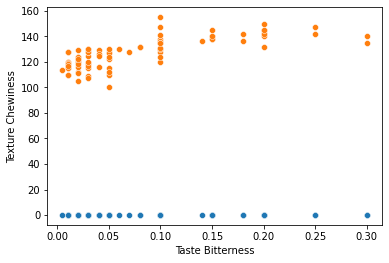

In [23]:
import seaborn as sns
sns.scatterplot(x="Taste Bitterness", y="Texture Chewiness", data=cookie_copy_15)
sns.scatterplot(x="Taste Bitterness", y="Texture Hardness", data=cookie_copy_15)


In [17]:
import statsmodels.api as sm


model = sm.OLS(cookie_copy_15["Texture Chewiness"], sm.add_constant(cookie_copy_15["Taste Bitterness"])).fit()

test_result = sm.stats.durbin_watson(model.resid)

print("Durbin-Watson(bitterness) is", test_result)

Durbin-Watson(bitterness) is 1.914728228534771


DW test statistic value(between bitterness and chewiness, hardness and chewiness) are in the range of 1.5 to 2.5, which means the independence assumption is met. It is important to check that the explanatory variables and response variable are independent.

In [18]:
#use DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
X = cookie_copy_15[["Texture Hardness","Taste Bitterness"]]
y = cookie_copy_15["Texture Chewiness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

clf = DecisionTreeRegressor(random_state=42,max_depth =20)

model = clf.fit(X_train, y_train)

y_train_predictions = model.predict(X_train)
print("Decision Tree Training Mean Squared Error is: ", mean_squared_error(y_train, y_train_predictions))

y_test_predictions = model.predict(X_test)
print("Decision Tree Testing Mean Squared Error is: ", mean_squared_error(y_test, y_test_predictions))

Decision Tree Training Mean Squared Error is:  3.075617164473309e-05
Decision Tree Testing Mean Squared Error is:  0.0004060060915775182


In [19]:
#usee linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = cookie_copy_15[["Texture Hardness","Taste Bitterness"]]
y = cookie_copy_15["Texture Chewiness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 


model = LinearRegression().fit(X_train, y_train)

y_train_predictions = model.predict(X_train)
print("Decision Tree Training Mean Squared Error is: ", mean_squared_error(y_train, y_train_predictions))

y_test_predictions = model.predict(X_test)
print("Decision Tree Testing Mean Squared Error is: ", mean_squared_error(y_test, y_test_predictions))

Decision Tree Training Mean Squared Error is:  0.0002690659703084861
Decision Tree Testing Mean Squared Error is:  0.0002767389702997002


Since we are predicting Texture Chewiness, which is a continuious target variable, there are limited number of models we can use. I was going to use logistic regression since this always gives a good accuracy in my midterm competition after comparing 8 common models. However， logistic regression can only take care of categorical target variable. Thus, i tried DecisionTreeRegressor(set the `max_depth` parameter in DecisionTreeRegressor to an appropriate quantity to reduce the runtime and avoid overfitting) and linear regression. After fitting the models, we can see both give us really small MSE, which is what we want. DecisionTreeRegressor gives me smaller MSE on the training set than that of linear regression but linear regression gives me smaller MSE on the testing set than that of DecisionTreeRegressor. Since the training set and testing set are surprisingly small in size, it is hard to determine which one is better. However, if the test sets are big enough, i can say linear regression performs much better than the DecisionTreeRegressor.

## Bonus (20pts)

Lasso Regression is a modification of Regression that adds a regularization penalty to the the parameter $\mathbf{\beta}$ learned by the model. The loss function for Lasso is the following:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 + \lambda \Vert \mathbf{\beta} \Vert = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y} + \lambda \Vert \mathbf{\beta} \Vert$$

Where $\lambda$ is a tuning parameter specified by the user.

Using worksheet 17 as a guide:

1. create an animation like in part c) for Lasso Regression. [15pts]
2. create at least two more animations using different values for $\lambda$ and the true $\mathbf{\beta}$ you used to generate the dataset (try steeper / less steep curves, and higher or close to zero intercepts). Briefly explain some key takeaways on how to tune $\lambda$. [5pts]

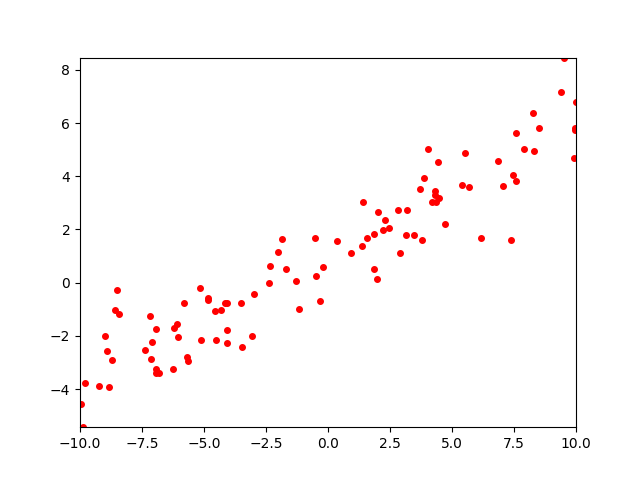

In [26]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#case1
beta = np.array([ 1 , .5 ])

xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()


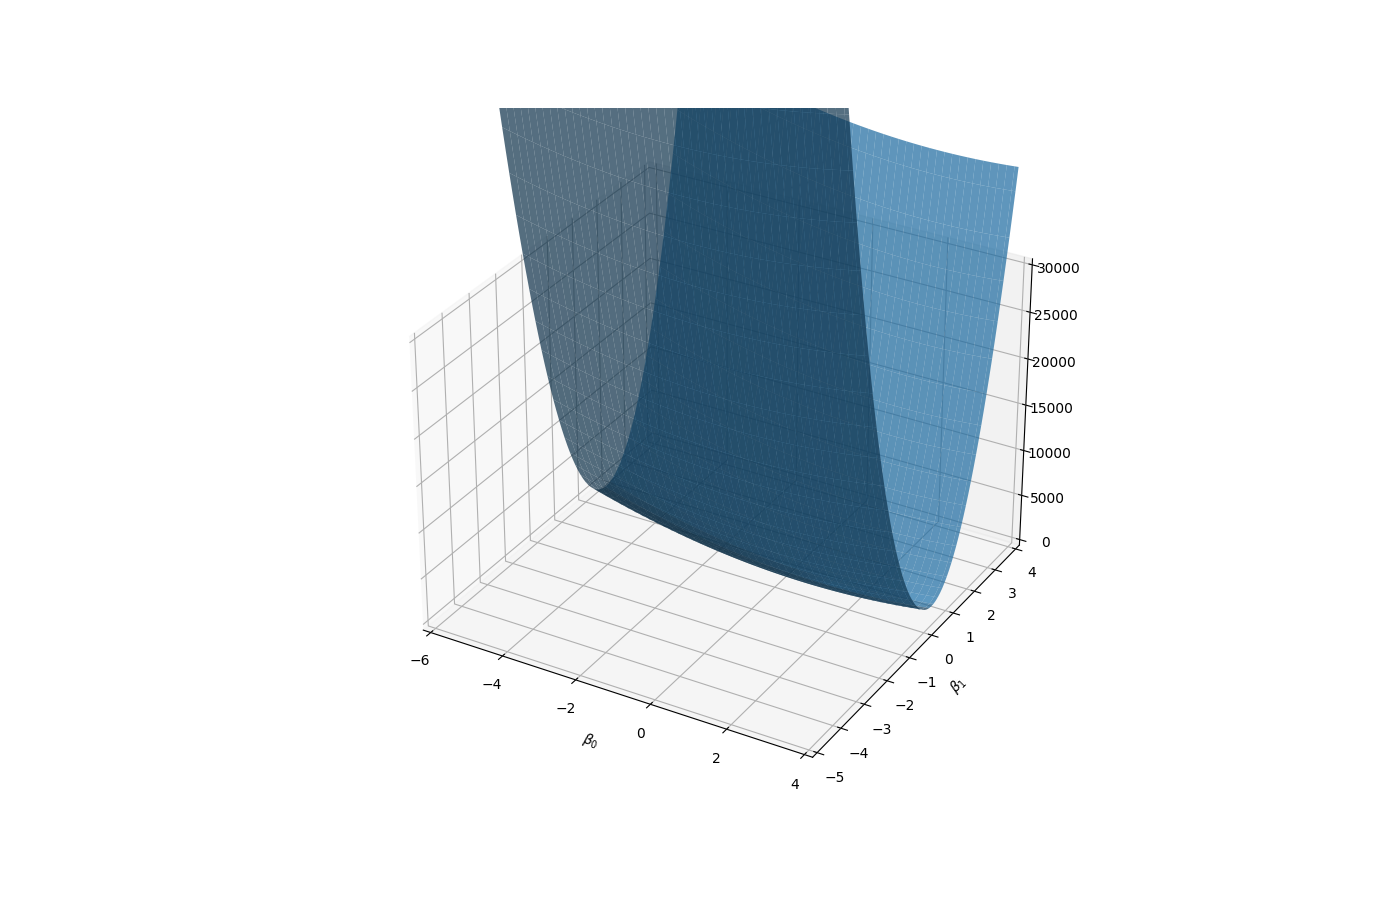

In [28]:
#case1
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    lamda = 0.05
    return np.linalg.norm(y - X @ beta)**2 + lamda*np.linalg.norm(beta)

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

In [3]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
#case1
TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    lamda = 0.001
    alpha = lamda / (2 * len(y))
    beta_sign = np.sign(beta)
    beta_sign[0] = 0 
    return 2 * X.T @ X @ beta - 2 * X.T @ y + alpha*beta_sign




def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 20, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

In [4]:
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

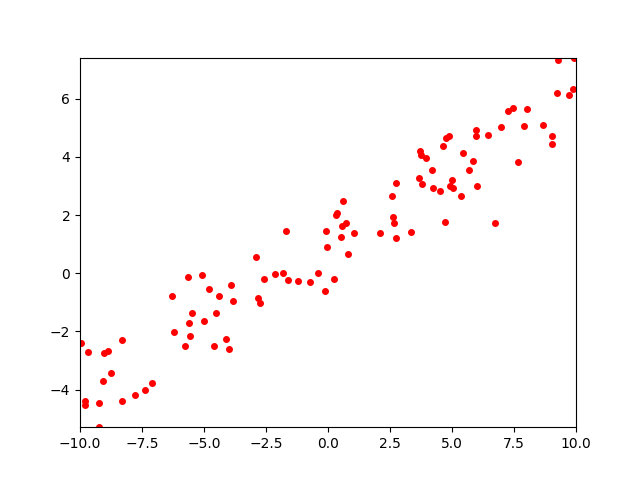

In [7]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#case3
beta = np.array([ 1 , .5 ])

xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

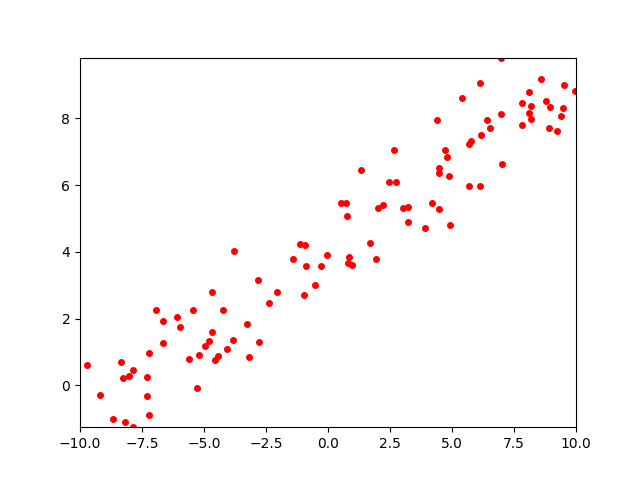

In [5]:
#TRY TO TUNE THE lamda and beta
#case2
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta_2 = np.array([ 4 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta_2[0]+(beta_2[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

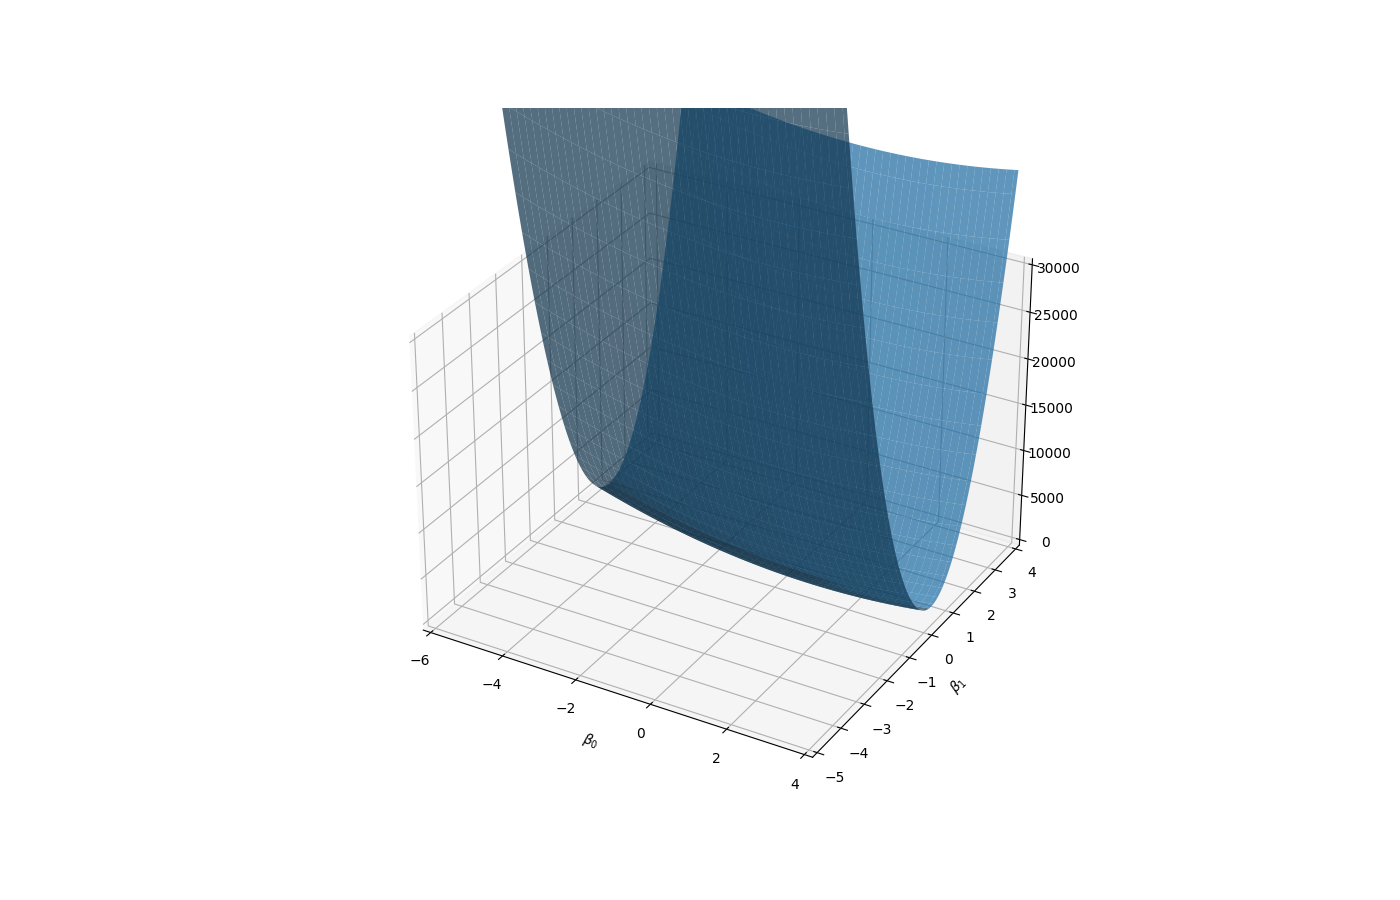

In [9]:
#case2 + case3
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    lamda = 1
    #case2
    # return np.linalg.norm(y - X @ beta_2)**2 + lamda*np.linalg.norm(beta_2)
    #case3
    return np.linalg.norm(y - X @ beta)**2 + lamda*np.linalg.norm(beta)


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

In [11]:
#case2 + case 3
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)
    
    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    lamda = 0.001
    alpha = lamda / (2 * len(y))
    beta_sign = np.sign(beta)
    beta_sign[0] = 0 
    return 2 * X.T @ X @ beta - 2 * X.T @ y + alpha*beta_sign




def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 20, images)

images[0].save(
    'gd_3.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

In [13]:
#case2+case3
def snap_model(beta):
    xplot = np.linspace(-10,10,50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot,'b-',lw=2)
    ax.plot(xlin, y,'ro',markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model_3.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In case 2 and 3, I tend to change beta and lamda. In case 3, I keep the beta the same as case 1 but boost lamda from 0.05 to 1. From gd_3 and gd_1 gif, we can tell tunning lamda too high would make the variance decrease, and bias increase. Gifs shows with bigger lamda, the regression model has hard time finding the next best step at the begining: the slope of the best fit line gets reduced and the line becomes horizontal. As this term is increased, the model becomes less responsive to the independent variables. From model and model_3 gifs, we can see the same problem. For case 2, in addition to increasing lamda from 0.05 to 1, I also changed beta making the slope steeper and closer to the zero inetrcept. The steeper slope makes the model taking bigger steps in average, but the two roughly takes the same time to reach the local min